In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, create_session
from sqlalchemy import create_engine, func, inspect, table, column

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
inspector = inspect(engine)


In [12]:
# Get a list of column names and types

columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

session.query(Measurement.date).order_by(Measurement.date.desc()).first()
session.query(Measurement.date).order_by(Measurement.date).first()
#Shows dates in database are from 1/1/2010 - 8/23/2017

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
Query1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >'2016-08-23').\
   order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
Plot1_pd = pd.DataFrame(data=Query1, columns=["Date", "Prcp"])

Plot1_pd = Plot1_pd.set_index("Date")
Plot1_pd.head(20)





,Prcp
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
#Set Variables
Prcp1 = Plot1_pd['Prcp']
Date1 = Plot1_pd.index.values

In [16]:
#need to clean data by dropping na values
Prcp1.dropna()

Date
2016-08-24    0.08
2016-08-24    2.15
2016-08-24    2.28
2016-08-24    1.22
2016-08-24    2.15
2016-08-24    1.45
2016-08-25    0.08
2016-08-25    0.08
2016-08-25    0.00
2016-08-25    0.00
2016-08-25    0.21
2016-08-25    0.06
2016-08-25    0.11
2016-08-26    0.00
2016-08-26    0.03
2016-08-26    0.02
2016-08-26    0.04
2016-08-26    0.00
2016-08-26    0.01
2016-08-27    0.00
2016-08-27    0.18
2016-08-27    0.02
2016-08-27    0.00
2016-08-27    0.12
2016-08-28    0.01
2016-08-28    0.14
2016-08-28    0.14
2016-08-28    0.14
2016-08-28    0.60
2016-08-28    2.07
              ... 
2017-08-15    0.00
2017-08-15    0.06
2017-08-15    0.32
2017-08-15    0.42
2017-08-16    0.00
2017-08-16    0.07
2017-08-16    0.12
2017-08-16    0.42
2017-08-17    0.00
2017-08-17    0.05
2017-08-17    0.01
2017-08-17    0.13
2017-08-18    0.00
2017-08-18    0.00
2017-08-18    0.06
2017-08-19    0.00
2017-08-19    0.00
2017-08-19    0.09
2017-08-20    0.00
2017-08-20    0.01
2017-08-21    0.00
2017-08

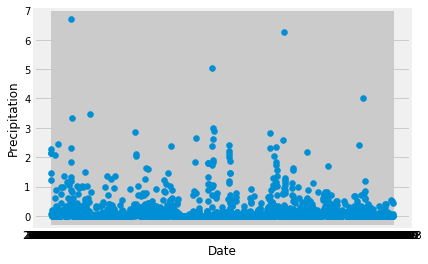

In [17]:

#create the plot

labels = "Precipitation"
x_axis = Date1
y_axis = Prcp1
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.tick_params(axis='y')
plt.tick_params(axis ='x')
plt.scatter(x_axis, y_axis)


![precipitation](Images/precipitation.png)

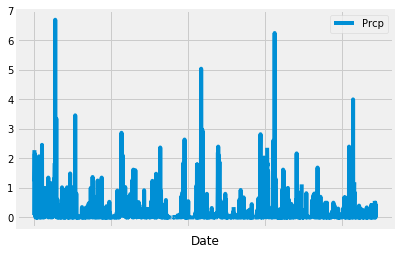

In [18]:
#The scatter plot above showed a better representation of the data, but here is the bar chart described in the homework folder
#create the plot
Plot1_pd.plot()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Plot1_pd.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
Query2 = session.query(func.count(Station.station)).all()
print (Query2)

[(9,)]


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Query3 = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())
Query3.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
#Which stations has the hightest number of observations? 
Query3.limit(1).all()

[('USC00519281', 2772)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Q4 = session.query(Measurement.tobs,func.min(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
Q5 = session.query(Measurement.tobs,func.max(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
Q6 = session.query(Measurement.tobs,func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
print (Q4)
print (Q5)
print (Q6)

[(54.0, 54.0)]
[(85.0, 85.0)]
[(70.0, 71.66378066378067)]


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Q7 = session.query(Measurement.date, Measurement.tobs).\
    group_by (Measurement.date).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >'2016-08-23').all()
print(Q7)

[('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10-07', 76.0), ('2016-10

In [25]:
Q7_df = pd.DataFrame(data=Q7, columns=["Date", "tobs"])
Q7_df.head(20)
 

,Date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
5,2016-08-29,78.0
6,2016-08-30,77.0
7,2016-08-31,78.0
8,2016-09-01,80.0
9,2016-09-02,80.0


NameError: name 'x' is not defined

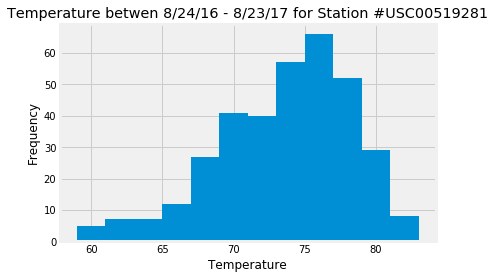

In [26]:
#make a histogram of Q7--yikes! 
# sns.set()
Q7_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature betwen 8/24/16 - 8/23/17 for Station #USC00519281')

plt.tick_params(axis=x)
plt.tick_params(axis=y)

# plt.show()





![precipitation](Images/station-histogram.png)

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVG, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
#prev_year = dt.datetime(2018, 1, 1) - dt.timedelta(days=365)
#prev_year_end = dt.datetime(2018, 1, 7)


# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()    
print(calc_temps('2011-02-28', '2011-03-05'))
Q8 = calc_temps('2011-02-28', '2011-03-05')

[(61.0, 69.75510204081633, 75.0)]


In [30]:
#This shows its a tuple,note ()
Q8[0]

(61.0, 69.75510204081633, 75.0)

In [31]:
Q8[0][1]

69.75510204081633

C:\Users\allys\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


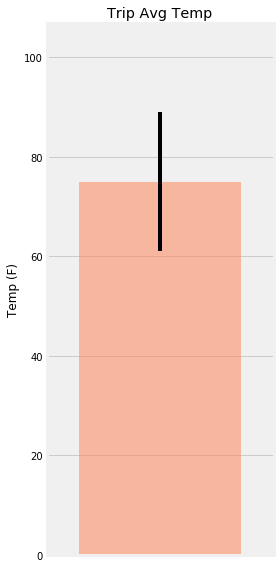

In [37]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
TMAX = Q8 [0][2]
TMIN = Q8 [0][0]
TAVG = Q8 [0][1]
Error_bar = Q8[0][2]- Q8[0][0]
x_axis = Q8[0][1]
#y_axis = Q8[0][2]
xpos=1
fig, ax= plt.subplots(figsize=plt.figaspect(2.))
bar = ax.bar(xpos,TMAX, yerr=Error_bar, alpha=.5, color='coral', align="center")
ax.set(xticks=range(xpos),xticklabels="a",title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2,.2)
#totalavg_plt = plt.bar(Q8[0][1], Error_bar)
# plt.title('Trip Avg Temp')

# plt.ylabel('Temp (F)')
fig.tight_layout()
fig.show()


In [87]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.

#Chosen trip date is June 1-14th
Q9 = session.query(Measurement.station,Measurement.date, Measurement.prcp).\
        group_by(Measurement.station).\
        group_by (Measurement.date).\
        filter(Measurement.date >'2016-05-31').filter(Measurement.date<'2016-06-15').all()
        
print(Q9)

[('USC00513117', '2016-06-01', 0.89), ('USC00513117', '2016-06-02', 0.15), ('USC00513117', '2016-06-03', 0.16), ('USC00513117', '2016-06-04', 0.0), ('USC00513117', '2016-06-05', 0.63), ('USC00513117', '2016-06-06', 0.36), ('USC00513117', '2016-06-07', 0.4), ('USC00513117', '2016-06-08', 0.0), ('USC00513117', '2016-06-09', 0.21), ('USC00513117', '2016-06-10', 0.06), ('USC00513117', '2016-06-11', 0.02), ('USC00513117', '2016-06-12', 0.04), ('USC00513117', '2016-06-13', 0.08), ('USC00513117', '2016-06-14', 0.06), ('USC00514830', '2016-06-01', 0.22), ('USC00514830', '2016-06-02', 0.35), ('USC00514830', '2016-06-03', 0.02), ('USC00514830', '2016-06-07', None), ('USC00514830', '2016-06-08', 0.0), ('USC00514830', '2016-06-09', 0.12), ('USC00514830', '2016-06-10', 0.13), ('USC00514830', '2016-06-11', 0.01), ('USC00514830', '2016-06-12', 0.26), ('USC00514830', '2016-06-13', 0.01), ('USC00514830', '2016-06-14', 0.0), ('USC00516128', '2016-06-01', 1.4), ('USC00516128', '2016-06-02', 0.74), ('USC0

In [166]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

Q9_df = pd.DataFrame(data=Q9, columns=["Station","Date", "prcp"])
        
Q9_df.head(20)
 

,Station,Date,prcp
0,USC00513117,2016-06-01,0.89
1,USC00513117,2016-06-02,0.15
2,USC00513117,2016-06-03,0.16
3,USC00513117,2016-06-04,0.00
4,USC00513117,2016-06-05,0.63
5,USC00513117,2016-06-06,0.36
6,USC00513117,2016-06-07,0.40
7,USC00513117,2016-06-08,0.00
8,USC00513117,2016-06-09,0.21
9,USC00513117,2016-06-10,0.06


In [167]:
Q9_df_station= Q9_df.groupby("Station").sum()
Q9_df_station=Q9_df_station.sort_values(by=['prcp'], ascending=False)
Q9_df_station


,prcp
Station,
USC00516128,8.55
USC00519281,4.54
USC00513117,3.06
USC00519523,1.88
USC00514830,1.12
USC00519397,0.14
USC00517948,0.00


In [170]:
Q9_df_station.reset_index()

,Station,prcp
0,USC00516128,8.55
1,USC00519281,4.54
2,USC00513117,3.06
3,USC00519523,1.88
4,USC00514830,1.12
5,USC00519397,0.14
6,USC00517948,0.00


In [169]:
station_df = pd.read_sql(session.query(Station).statement, session.bind)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [168]:
#so need to merge on station with "station" to get the other columns: name, lat, lon, and elev.
df_merged = pd.merge(Q9_df_station.reset_index(),station_df,left_on='Station', right_on='station')
df_merged.head()

,Station,prcp,id,station,name,latitude,longitude,elevation
0,USC00516128,8.55,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,4.54,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,3.06,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,1.88,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,1.12,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0


In [140]:
station_df = pd.read_sql(session.query(Station).statement, session.bind)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6
